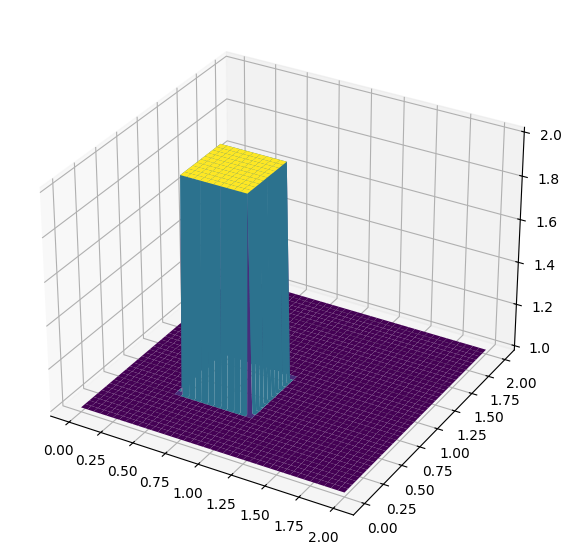

In [20]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML


#variable declaration

nx = 81
ny = 81
nt = 201
nu = 0.05
dx = 2/(nx-1)
dy = 2/(ny-1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx))
un = np.ones((ny,nx))

#Initial Conditions
u[int(0.5/dy):int(1/dy + 1), int(0.5/ dx): int(1/dx+1)] = 2

fig = plt.figure(figsize = (11,7), dpi = 100)
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y, u[:], cmap = cm.viridis)

In [21]:
fig = plt.figure(figsize = (11,7), dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
ax.axes.set_zlim3d(bottom=0, top=2)
X, Y = np.meshgrid(x,y)
line = ax.plot_surface(X,Y, u[:])

def animate(frame):
    un = u.copy()
    #Array Operations
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] + (nu * dt/(dx**2) * (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]))
                     + (nu * dt/(dy**2) * (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0]= 1
    u[:,-1] = 1
    ax.clear()
    ax.axes.set_zlim3d(bottom=1, top=2)
    line = ax.plot_surface(X,Y,u[:], cmap = cm.viridis)
    return line,

anim = FuncAnimation(fig, animate, frames = nt+1, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()